# U-Phase: Die Daten verstehen (Explorative Datenanalyse)

Im Projekt **„Degrees of No Return“** wollen wir globale Klimadaten so übersetzen, dass sie lokale Risiken greifbar machen. Diese erste Phase, die explorative Datenanalyse (EDA), ist dafür das Fundament. Hier prüfen wir die Qualität, die Struktur und die Eigenheiten unserer Rohdaten, um sicherzustellen, dass die Vorhersagen unserer späteren Web-App auf einer soliden wissenschaftlichen Grundlage stehen.

---

## Aufgabe 1: Wahl und Beschreibung der Datensätze

Um die zentralen Forschungsfragen unseres Projekts zu beantworten – die Verknüpfung von CO₂-Anstieg mit lokaler Hitze und Meeresspiegelanstieg mit lokaler Überflutungsgefahr – nutzen wir vier anerkannte, wissenschaftliche Datenquellen. Im Folgenden werden diese detailliert beschrieben.

### 1. Globale Temperaturveränderungen (NASA GISS Surface Temp v4)
**Einfach erklärt:** Dieser Datensatz ist wie ein riesiges Fieberthermometer für unsere Erde. Er zeigt uns Monat für Monat seit dem Jahr 1880, wie sehr sich die Durchschnittstemperatur auf der Welt im Vergleich zu früher verändert hat. So können wir genau sehen, wie stark und wie schnell sich unser Planet erwärmt.
* **Herkunft:** NASA Goddard Institute for Space Studies (GISS).
* **Erhebungsmethode:** Der Datensatz kombiniert Messungen von Tausenden Wetterstationen an Land mit ozeanografischen Oberflächendaten. Diese werden auf ein globales Raster umgerechnet, um eine konsistente, weltweite Abdeckung zu gewährleisten.
* **Erfassungszeitraum:** 1880 bis heute (monatliche Daten).
* **Datenstruktur:** Gespeichert im NetCDF-Format (`.nc`), einem Standard für wissenschaftliche, mehrdimensionale Daten. Er enthält über 1.700 Zeitschritte (Monate) auf einem globalen 90x180-Grad-Raster, was die räumliche und zeitliche Dimension abbildet.
* **Verwendungszweck im Projekt:** Dies ist unsere **„Ground Truth“ für Temperatur**. Das Machine-Learning-Modell unserer App lernt aus diesen historischen Daten den Zusammenhang zwischen globalen Treibern (wie CO₂) und der tatsächlichen Erwärmung. Dies ist die Basis, um für die Zukunft die Zunahme von **lokalen Hitzetagen** zu prognostizieren.
* **Link zum Datensatz:** [NASA GISS Surface Temperature Analysis](https://data.giss.nasa.gov/gistemp/)

### 2. CO₂-Konzentration in der Atmosphäre (NOAA Mauna Loa)
**Einfach erklärt:** CO₂ (Kohlendioxid) ist das Treibhausgas, das sich wie eine wärmende Decke um unsere Erde legt. Dieser Datensatz misst seit 1958 direkt auf einem Vulkan in Hawaii, wie dick diese "Decke" wird. Er liefert uns den direkten Beweis dafür, dass der CO₂-Gehalt in der Luft unaufhaltsam steigt.
* **Herkunft:** NOAA Global Monitoring Laboratory (GML), bekannt als die „Keeling-Kurve“.
* **Erhebungsmethode:** Direktmessung (in-situ) der atmosphärischen CO₂-Konzentration auf dem Mauna Loa Observatorium auf Hawaii, die als Referenz für die globale CO₂-Entwicklung gilt.
* **Erfassungszeitraum:** 1958 bis heute (monatliche Daten).
* **Datenstruktur:** Einfaches CSV-Format, das neben dem Datum vor allem den `average` (gemittelter Messwert) und den `deseasonalized` (saisonbereinigter) Wert enthält.
* **Verwendungszweck im Projekt:** Der CO₂-Wert ist der **zentrale globale Treiber (Prädiktor)** für die Klimaerwärmung. Unsere App wird ein Modell nutzen, das lernt, wie Veränderungen in dieser Datenreihe die lokalen Temperaturen beeinflussen. Damit können Nutzer im Frontend verschiedene Emissionsszenarien durchspielen.
* **Link zum Datensatz:** [NOAA Global Monitoring Laboratory - Trends in CO2](https://gml.noaa.gov/ccgg/trends/data.html)

### 3. Globaler Meeresspiegelanstieg (EPA / CSIRO / NOAA)
**Einfach erklärt:** Wenn es wärmer wird, schmilzt das Eis an den Polen und das Meerwasser dehnt sich aus – dadurch steigt der Meeresspiegel. Dieser Datensatz misst genau diesen Anstieg seit über 140 Jahren. Er ist für uns wichtig, um zu berechnen, ab wann das Wasser so hoch steht, dass es in Zukunft unsere Straßen und Häuser bedrohen könnte.
* **Herkunft:** Kombinierte Daten von führenden Klimabehörden wie EPA, CSIRO und NOAA.
* **Erhebungsmethode:** Der Datensatz fusioniert zwei Datenquellen: historische Messungen von Küstenpegeln (Tide Gauges) und hochpräzise, moderne Satelliten-Altimetriedaten seit 1993.
* **Erfassungszeitraum:** 1880 bis heute (jährliche Daten).
* **Datenstruktur:** CSV-Format mit dem `CSIRO Adjusted Sea Level` als Hauptmerkmal sowie Fehlergrenzen (`Lower/Upper Error Bound`), die die Unsicherheit der Messungen angeben.
* **Verwendungszweck im Projekt:** Dieser Datensatz liefert die **historische Zielvariable** für das Überflutungsrisiko. Unser Modell lernt den Zusammenhang zwischen globaler Erwärmung und dem Anstieg des Meeresspiegels. In der App kann der Nutzer dann über einen Zeit-Slider sehen, wie sich die prognostizierte Meeresspiegeländerung auf die lokale Topografie auswirkt.
* **Schwäche/Limitation:** Dieser Datensatz bildet ausschließlich den Meeresspiegel ab. **Binnenhochwasser (pluvial/fluvial)** durch Starkregen oder Flüsse werden hierdurch nicht erfasst.
* **Link zum Datensatz:** [EPA Climate Change Indicators: Sea Level](https://github.com/datasets/sea-level-rise/blob/main/data/epa-sea-level.csv)

### 4. Detaillierte 3D-Karte der Erdoberfläche (Copernicus DEM)
**Einfach erklärt:** Das ist eine hochgenaue, dreidimensionale Landkarte unserer Erde aus dem All. Sie weiß für jeden Punkt exakt, wie hoch er über dem Meeresspiegel liegt. Wir nutzen diese Karte in unserem Projekt, um ganz konkret zu zeigen, welche lokalen Gebiete (z.B. ein Quartier in einer Stadt) bei einem bestimmten Meeresspiegelanstieg unter Wasser stehen würden.
* **Herkunft:** Europäische Weltraumorganisation (ESA), bereitgestellt via Cloud-Dienst (AWS S3).
* **Erhebungsmethode:** Globales digitales Höhenmodell (DEM), das mittels Satelliten-Radar-Messungen mit einer horizontalen Auflösung von ca. 30 Metern erstellt wurde.
* **Erfassungszeitraum:** Es handelt sich um eine statische, aktuelle Abbildung der Topografie.
* **Datenstruktur:** GeoTIFF, ein Standardformat für Geodaten. Jeder Pixel in der Datei repräsentiert einen exakten Höhenwert.
* **Verwendungszweck im Projekt:** Dies ist die **räumliche Grundlage für die lokale Risikoanalyse**. Wenn unser Modell einen bestimmten Meeresspiegelanstieg vorhersagt, dient diese hochaufgelöste Karte dazu, die potenziellen Überflutungsflächen zu berechnen und in der interaktiven Karte der Web-App zu visualisieren. Erst dadurch wird die globale Gefahr für den Nutzer lokal sichtbar.
* **Schwäche/Limitation:** Die Auflösung von 30 Metern ist **nicht parzellengenau**. Sie reicht für Quartiersplanungen, aber nicht, um zu bestimmen, ob ein spezifischer Keller überflutet wird.
* **Link zum Datensatz:** [Copernicus Digital Elevation Model (Open Data auf AWS)](https://registry.opendata.aws/copernicus-dem/)

---


## Aufgabe 2: Ein Bild sagt mehr als tausend Zahlen – erste Grafiken

Diagramme und Karten sind der beste Weg, um Muster, Trends oder auch Fehler in den Daten schnell zu erkennen. Bevor wir mit der grafischen Analyse für das Projekt **„Degrees of No Return“** beginnen, laden wir die notwendigen Software-Werkzeuge (sogenannte Python-Bibliotheken), die uns dabei helfen, die komplexen Raum- und Zeitdaten zu visualisieren.

In [ ]:
# ============================================================
# Bibliotheken importieren
# Diese Pakete stellen alle Funktionen bereit, die wir im
# gesamten Notebook benötigen. Sie müssen nur einmal
# am Anfang importiert werden.
# ============================================================

from pathlib import Path       # Plattformunabhängige Dateipfade (Windows & Linux)
import pandas as pd            # Tabellarische Daten lesen, filtern und verarbeiten
import xarray as xr            # Mehrdimensionale Klimadaten (NetCDF-Format) öffnen
import matplotlib.pyplot as plt # Diagramme und Grafiken erstellen
import cartopy.crs as ccrs     # Geographische Projektionen für Weltkarten
import cartopy.feature as cfeature  # Vorgefertigte Kartenlayer (Küsten, Grenzen, …)
import rasterio                # Rasterdaten/Höhenmodelle (GeoTIFF) lesen
from rasterio.session import AWSSession  # Anonymen Zugriff auf AWS S3-Buckets ermöglichen
import numpy as np             # Numerische Berechnungen und Array-Operationen


### Vorbereitung: Daten laden
Jetzt teilen wir dem Programm mit, wo die Datendateien auf dem Computer gespeichert sind, und laden sie. Die 3D-Karte für unsere Beispielregion Düsseldorf rufen wir dabei direkt aus dem Internet ab.

In [ ]:
# ============================================================
# Dateipfade definieren
# Wir ermitteln das übergeordnete Verzeichnis dynamisch.
# Wird das Notebook als Skript ausgeführt, nutzen wir __file__,
# sonst das aktuelle Arbeitsverzeichnis (typisch im Notebook).
# ============================================================
base_dir = Path(__file__).resolve().parent.parent if "__file__" in globals() else Path.cwd() / "data"

# Absolute Pfade zu den drei lokalen Datendateien
co2         = base_dir / "co2_mm_mlo.csv"               # CO₂-Monatsmittelwerte (NOAA Mauna Loa)
sea_level   = base_dir / "epa_sea_level.csv"             # Globaler Meeresspiegel (EPA/CSIRO)
tempanomaly = base_dir / "gistemp1200_GHCNv4_ERSSTv5.nc" # Globale Temperaturanomalien (NASA GISS)

# ============================================================
# Plausibilitätsprüfung: Existieren alle Dateien?
# Schlägt dies fehl, beenden wir das Notebook sofort mit
# einer verständlichen Fehlermeldung – kein stiller Fehler.
# ============================================================
files_to_check = [co2, sea_level, tempanomaly]
missing = [str(f) for f in files_to_check if not f.exists()]
if missing:
    raise FileNotFoundError(f"Folgende Dateien fehlen: {', '.join(missing)}")

# ============================================================
# Daten einlesen
# comment="#" überspringt alle Metadaten-Kopfzeilen der NOAA,
# die mit '#' beginnen. on_bad_lines="skip" ignoriert
# beschädigte Zeilen und bricht nicht ab.
# ============================================================
df_co2           = pd.read_csv(co2,       comment="#", on_bad_lines="skip", engine="python")
df_sea_level     = pd.read_csv(sea_level, comment="#", on_bad_lines="skip", engine="python")
dataset_tempanomaly = xr.open_dataset(tempanomaly)  # NetCDF → xarray-Dataset (lazy loading)

# ============================================================
# URL für das Copernicus Höhenmodell (Copernicus DEM GLO-30)
# Der öffentliche S3-Bucket von AWS erlaubt anonymen Zugriff.
# Die Kachel N51/E006 deckt das Rheinland (inkl. Düsseldorf) ab.
# ============================================================
aws_url_topography = (
    "s3://copernicus-dem-30m/"
    "Copernicus_DSM_COG_10_N51_00_E006_00_DEM/"
    "Copernicus_DSM_COG_10_N51_00_E006_00_DEM.tif"
)


### 2.1 Der unaufhaltsame Anstieg: Die CO₂-Konzentration

Diese Grafik ist zentral für das Verständnis des Klimawandels. Sie zeigt die Entwicklung der CO₂-Konzentration in der Atmosphäre.

*   Die **grüne Linie** (monatliche Messung) zeigt ein klares "Zick-Zack"-Muster. Dies sind die natürlichen, saisonalen Schwankungen, die z.B. durch die Vegetation auf der Nordhalbkugel verursacht werden (Pflanzen nehmen im Sommer CO₂ auf und geben es im Winter wieder ab).
*   Die **rote Linie** (`deseasonalized`) ist für unser Projekt entscheidend. Sie glättet diese saisonalen Schwankungen und offenbart den eigentlichen, langfristigen Trend. Dieser unaufhaltsame Anstieg ist der Motor des Klimawandels, den wir in der „Degrees of No Return“-App modellieren wollen.

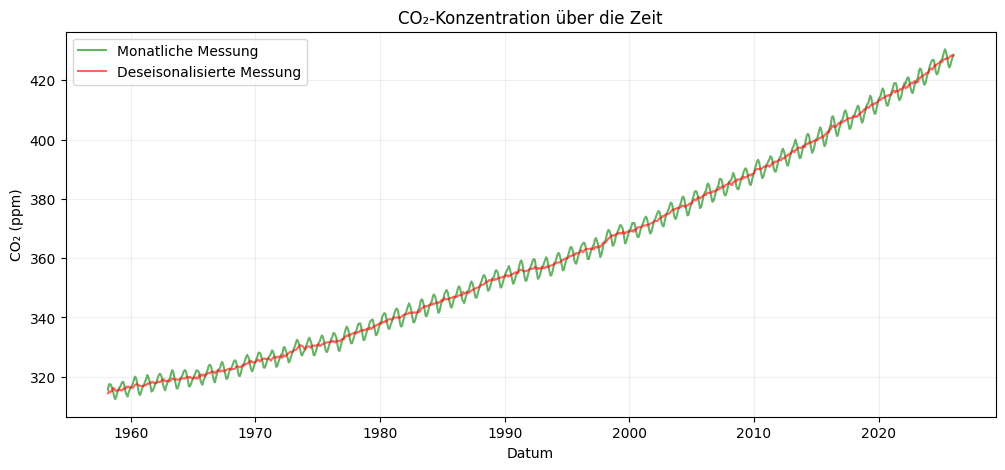

In [ ]:
# ============================================================
# Zeitspalte aus Jahr und Monat zusammensetzen
# pd.to_datetime erwartet ein Dict mit 'year', 'month', 'day'.
# Wir ergänzen 'day=1', da nur Monatsmittelwerte vorliegen.
# Der Index wird anschließend chronologisch sortiert.
# ============================================================
df_co2['date'] = pd.to_datetime(df_co2[['year', 'month']].assign(day=1))
df_co2 = df_co2.set_index('date').sort_index()

# ============================================================
# Liniendiagramm: CO₂-Konzentration seit 1958
# 'average'       = roher Monatsmittelwert mit saisonalen Schwankungen
# 'deseasonalized'= saisonbereinigter Trend (jahreszeitliche
#                   Auf- und Abstiege herausgerechnet) → zeigt den
#                   reinen, durch den Menschen verursachten Anstieg
# ============================================================
plt.figure(figsize=(12, 5))
plt.plot(df_co2.index, df_co2['average'],
         color='green', alpha=0.6, label='Monatliche Messung')
plt.plot(df_co2.index, df_co2['deseasonalized'],
         color='red',   alpha=0.6, label='Deseisonalisierte Messung')
plt.title('CO₂-Konzentration über die Zeit')
plt.xlabel('Datum')
plt.ylabel('CO₂ (ppm)')           # ppm = parts per million (Teile pro Million Luftmoleküle)
plt.grid(alpha=0.2)
plt.legend()
plt.show()


### 2.2 Steigende Ozeane: Der globale Meeresspiegel

Diese Grafik zeigt, wie der globale Meeresspiegel seit 1880 angestiegen ist. Für unser Projekt ist die Transparenz über Datenunsicherheiten, insbesondere gegenüber unserer Zielgruppe aus Planung und Versicherungswesen, essenziell.

*   Die **blaue Linie** (`CSIRO Adjusted Sea Level`) stellt den wissenschaftlich angepassten Mittelwert dar.
*   Der **hellblau schattierte Bereich** ist der „Fehlerbereich“ (`Error Bound`). Er visualisiert die Unsicherheit, die vor allem in den älteren Messungen vor der Satelliten-Ära (vor 1993) vorhanden ist. Der wahre Wert lag historisch wahrscheinlich innerhalb dieser Spanne.
*   Die **rote Linie** zeigt den geglätteten 5-Jahres-Mittelwert und macht so den langfristigen Trend noch deutlicher sichtbar.

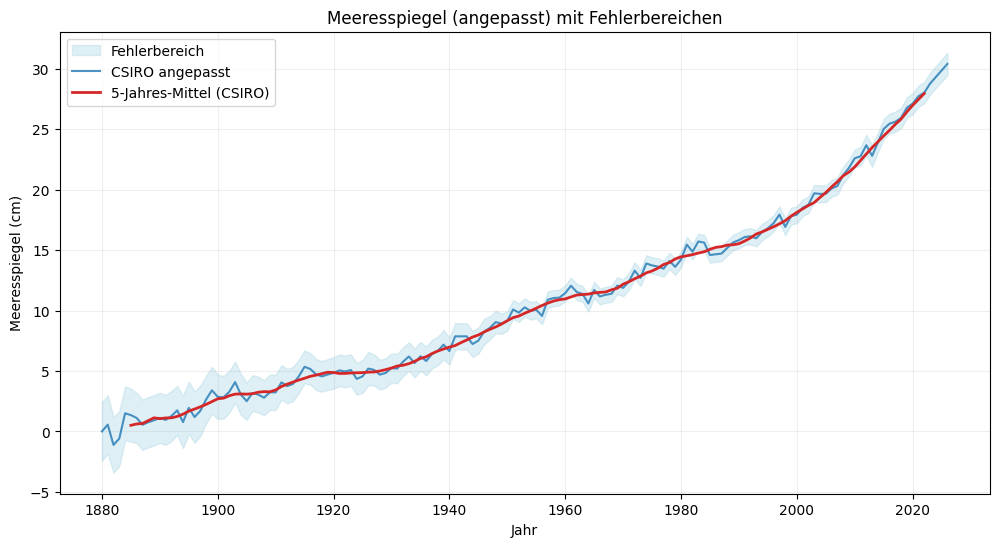

In [ ]:
# ============================================================
# Zeitspalte erstellen
# Die Jahresangabe liegt als Dezimalzahl vor (z. B. 1880.0),
# wir schneiden sie auf ganze Jahre ab und konvertieren.
# ============================================================
df_sea_level['date'] = pd.to_datetime(df_sea_level['Year'].astype(int).astype(str), format='%Y')
df_sea_level = df_sea_level.set_index('date').sort_index()

# ============================================================
# Einheit: Zoll (inch) → Zentimeter
# Der EPA-Datensatz liefert Messwerte in Inch (US-Standard).
# Für unser deutschsprachiges Publikum rechnen wir in cm um.
# Umrechnungsfaktor: 1 Inch = 2,54 cm
# ============================================================
inch_to_cm = 2.54
for col in ['Lower Error Bound', 'Upper Error Bound', 'CSIRO Adjusted Sea Level']:
    df_sea_level[col] = df_sea_level[col].astype(float) * inch_to_cm

# ============================================================
# Liniendiagramm: Globaler Meeresspiegel seit 1880
# fill_between zeichnet den Fehlerbereich (Unsicherheitsband)
#   → Vor 1993 (vor Satellitenmessungen) ist dieser Bereich breiter
# rolling(10).mean() = gleitender 10-Jahres-Durchschnitt
#   → filtert kurzfristige Schwankungen heraus und zeigt den Trend
# ============================================================
plt.figure(figsize=(12, 6))
plt.fill_between(
    df_sea_level.index,
    df_sea_level['Lower Error Bound'],
    df_sea_level['Upper Error Bound'],
    color='lightblue', alpha=0.4, label='Fehlerbereich (Unsicherheit)'
)
plt.plot(df_sea_level.index, df_sea_level['CSIRO Adjusted Sea Level'],
         label='CSIRO angepasst', color='tab:blue', alpha=0.8)
plt.plot(
    df_sea_level['CSIRO Adjusted Sea Level'].rolling(10, center=True).mean(),
    color='tab:red', linewidth=2, label='10‑Jahres‑Mittel (CSIRO)'
)
plt.title('Meeresspiegel (angepasst) mit Fehlerbereichen')
plt.xlabel('Jahr')
plt.ylabel('Meeresspiegel (cm)')
plt.grid(alpha=0.2)
plt.legend()
plt.show()


### 2.3 Eine Welt, unterschiedliche Erwärmung: Die globale Temperaturkarte

Die Web-App „Degrees of No Return“ soll globale Phänomene lokal erlebbar machen. Diese Weltkarte ist der erste Schritt dieses „Downscaling“-Prozesses. Sie zeigt die **Temperaturanomalien** im Januar 2024.

Eine **Anomalie** ist nicht die absolute Temperatur, sondern die Abweichung von einem langjährigen Durchschnitt (hier: 1951-1980). Rote Gebiete waren also deutlich wärmer als für einen Januar üblich, blaue Gebiete waren kühler. 

Man erkennt klar globale Muster: Regionen wie die Arktis oder Nordamerika erwärmen sich signifikant schneller als andere. Im nächsten Schritt wird unser Modell lernen, aus diesem globalen Muster eine präzise Vorhersage für eine konkrete, lokale Region abzuleiten.

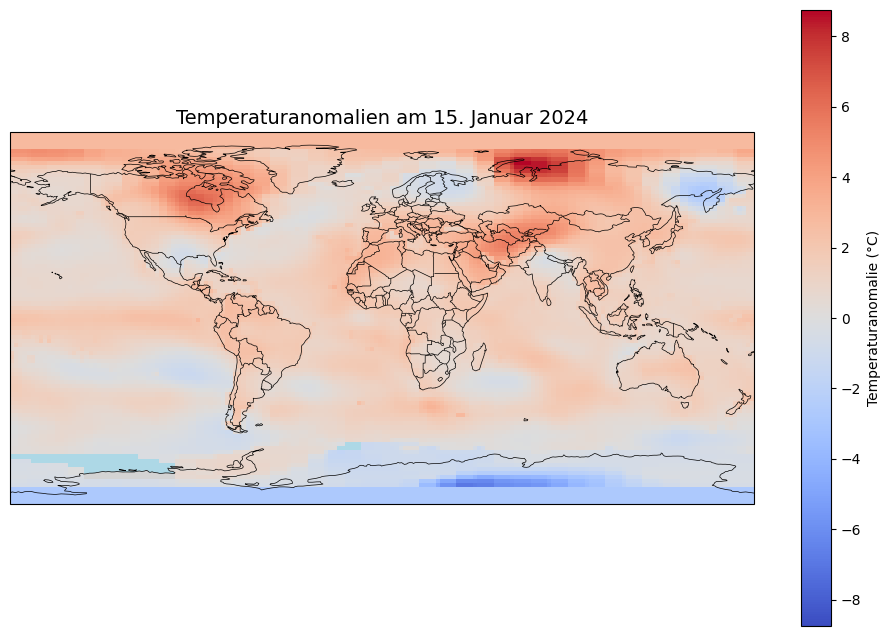

In [ ]:
# ============================================================
# Zeitpunkt auswählen
# Wir wählen den 15. Januar 2024, da der NASA-GISTEMP-Datensatz
# die Monatsmittelwerte auf den 15. des jeweiligen Monats referenziert.
# ============================================================
year = 2024

# .sel() = "select" – wählt einen einzelnen Zeitschritt aus dem
# mehrdimensionalen xarray-Dataset aus (lat × lon × time → lat × lon)
tempanomaly = dataset_tempanomaly["tempanomaly"].sel(time=f"{year}-01-15")

# ============================================================
# Kartenplot konfigurieren
# subplot_kw={"projection": ...} übergibt die Kartenprojektion
# an Matplotlib. PlateCarree = einfache rechteckige Projektion
# (Länge/Breite direkt als x/y-Koordinaten).
# ============================================================
fig, ax = plt.subplots(
    figsize=(12, 8),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

# Kartografische Hintergrundelemente hinzufügen
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)    # Küstenlinien (dünne Linie)
ax.add_feature(cfeature.BORDERS,   linewidth=0.5)    # Staatsgrenzen
ax.add_feature(cfeature.LAND,      facecolor="lightgray")   # Landflächen grau einfärben
ax.add_feature(cfeature.OCEAN,     facecolor="lightblue")   # Ozeane hellblau einfärben

# ============================================================
# Temperaturanomalien als Farbfläche plotten
# cmap="coolwarm": Blau = kühler als normal, Rot = wärmer als normal
# transform=ccrs.PlateCarree() teilt Cartopy mit, in welchem
# Koordinatensystem die Daten vorliegen (identisch zur Projektion).
# ============================================================
tempanomaly.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="coolwarm",
    cbar_kwargs={"label": "Temperaturanomalie (°C)"}  # Beschriftung der Farbskala
)

ax.set_title(f"Temperaturanomalien am 15. Januar {year}", fontsize=14)
plt.show()


### 2.4 Lokales Risiko: Die 3D-Geländekarte von Düsseldorf

Hier sehen wir die „Leinwand“ für eine der Kernfunktionen unserer App: die Visualisierung von Überflutungsrisiken. Die Karte zeigt ein digitales Höhenmodell (DEM) für den Großraum Düsseldorf.

Jede Farbe repräsentiert eine bestimmte Höhe über dem Meeresspiegel. Dunkle, blau-grüne Bereiche liegen tief (z.B. der Rhein), gelbe und braune Farbtöne stellen höhere Lagen dar. Wenn unser Modell einen zukünftigen Meeresspiegelanstieg prognostiziert, werden wir auf Basis dieser exakten Höhendaten berechnen und visualisieren, welche Flächen überflutet würden. So wird aus einer abstrakten globalen Zahl eine konkrete, lokale Betroffenheit.

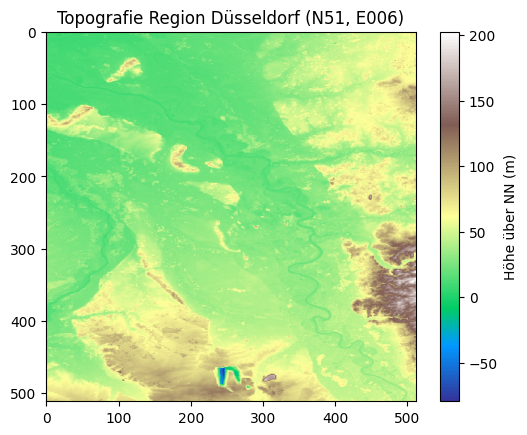

In [ ]:
# ============================================================
# Höhenmodell vom AWS S3-Bucket laden und visualisieren
#
# rasterio.Env(AWSSession(aws_unsigned=True)):
#   → Öffnet eine Verbindung zum S3-Bucket ohne Login-Daten,
#     da der Copernicus-Bucket öffentlich zugänglich ist.
#
# src.read(1, out_shape=(512, 512)):
#   → Liest Band 1 (Höhenwerte in Meter) des GeoTIFFs.
#   → out_shape=(512, 512) verkleinert das Original (~3600×3600 px)
#     auf eine handhabbare Größe für die Preview-Darstellung.
#     Dies spart Arbeitsspeicher und Ladezeit.
# ============================================================
with rasterio.Env(AWSSession(aws_unsigned=True)):
    with rasterio.open(aws_url_topography) as src:
        dem_preview = src.read(1, out_shape=(512, 512))  # Höhendaten als numpy-Array einlesen

# "terrain"-Colormap: Braun = hohe Bereiche, Grün = flaches Land, Blau = unter NN
plt.imshow(dem_preview, cmap='terrain')
plt.colorbar(label='Höhe über NN (m)')   # Legende mit physikalischer Einheit
plt.title("Topografie Region Düsseldorf (N51, E006)")
plt.show()


---

## Aufgabe 3: Die Detektivarbeit – Umgang mit fehlenden Daten

Ein zentrales Qualitätsversprechen unseres Projekts ist die wissenschaftliche Nachvollziehbarkeit. Daher ist es entscheidend, Datenlücken nicht nur zu finden, sondern zu verstehen, *warum* sie existieren.


In [ ]:
# ============================================================
# CO₂-Datensatz: Spezifische Platzhalter für fehlende Werte ersetzen
#
# Die NOAA verwendet keine NaN-Werte, sondern feste numerische
# Sentinels, um anzuzeigen, dass ein Wert nicht verfügbar ist:
#   ndays = -1    → Anzahl der Messtage unbekannt
#   sdev  = -9.99 → Standardabweichung nicht aufgezeichnet
#   unc   = -0.99 → Messunsicherheit nicht aufgezeichnet
#
# replace() tauscht diese Pseudowerte durch echte NaN-Werte aus,
# damit Pandas sie in allen nachfolgenden Berechnungen korrekt
# als "fehlend" behandelt (z. B. isnull(), mean() usw.).
# ============================================================
df_co2['ndays'] = df_co2['ndays'].replace(-1,    np.nan)
df_co2['sdev']  = df_co2['sdev'].replace(-9.99,  np.nan)
df_co2['unc']   = df_co2['unc'].replace(-0.99,   np.nan)

# ============================================================
# Fehlende Werte zählen: absolute Anzahl und Prozentanteil
# isnull().sum() zählt NaN-Einträge je Spalte.
# Das Ergebnis wird in einem übersichtlichen DataFrame ausgegeben.
# ============================================================
print("--- CO2 Datensatz: Fehlende Werte ---")
co2_missing     = df_co2.isnull().sum()
co2_missing_pct = (co2_missing / len(df_co2)) * 100
print(pd.DataFrame({'Absolut': co2_missing, 'Prozentual (%)': co2_missing_pct.round(2)}))

print("\n--- Meeresspiegel Datensatz: Fehlende Werte ---")
sea_missing     = df_sea_level.isnull().sum()
sea_missing_pct = (sea_missing / len(df_sea_level)) * 100
print(pd.DataFrame({'Absolut': sea_missing, 'Prozentual (%)': sea_missing_pct.round(2)}))


--- CO2 Datensatz: Fehlende Werte ---
                Absolut  Prozentual (%)
year                  0            0.00
month                 0            0.00
decimal date          0            0.00
average               0            0.00
deseasonalized        0            0.00
ndays               195           23.93
sdev                196           24.05
unc                 194           23.80

--- Meeresspiegel Datensatz: Fehlende Werte ---
                          Absolut  Prozentual (%)
Year                            0            0.00
CSIRO Adjusted Sea Level        0            0.00
Lower Error Bound               0            0.00
Upper Error Bound               0            0.00
NOAA Adjusted Sea Level       113           76.87


### Erkenntnisse und strategische Entscheidung

Die Analyse zeigt, dass die Datenlücken nicht zufällig sind, sondern strukturelle, also historisch und technisch bedingte, Ursachen haben:

1.  **CO₂-Daten:** Die Kern-Messwerte (`average`) sind vollständig. Es fehlen lediglich Metadaten wie die Standardabweichung (`sdev`) oder Messunsicherheit (`unc`) in den Jahren vor 1974. Der Grund: Das Bewusstsein für den Klimawandel und die damit einhergehende Notwendigkeit feingranularer statistischer Analysen war noch nicht so ausgeprägt, weshalb die Messprotokolle damals einfacher waren und diese Zusatzinformationen nicht erfasst wurden.
2.  **Meeresspiegel-Daten:** Die Spalte `NOAA Adjusted Sea Level` weist für die Zeit vor 1993 eine Lücke von ca. 84% auf. Der Grund ist technischer Natur: Diese Messreihe basiert rein auf Satellitendaten (Altimetrie), und diese Technologie steht erst seit 1993 zur Verfügung. Für die Jahre davor *kann* es logischerweise keine Satellitendaten geben.

**Strategie: Keine künstliche Daten-Imputation**

Wie in unserer Projekt-Charta (`AGENT.md`) festgelegt, muss unser Ansatz nachvollziehbar und wissenschaftlich fundiert sein. Eine künstliche „Erfindung“ von fehlenden Werten durch statistische Verfahren (Imputation) wäre hier grob fehlerhaft und würde die Glaubwürdigkeit der „Degrees of No Return“-App untergraben.

*   **Konsequenz für das Modell:** Wir werden ausschließlich die durchgängig verfügbaren und validen Kern-Features für das Training der Modelle verwenden. Dies sind der `deseasonalized`-Wert beim CO₂ und der `CSIRO Adjusted Sea Level` beim Meeresspiegel. Die unvollständigen Spalten werden für die Modellierung ignoriert.

---

## Aufgabe 4: Alles auf einen vergleichbaren Maßstab bringen (Skalierung)

Für das Projekt „Degrees of No Return“ kombinieren wir Daten mit völlig unterschiedlichen Wertebereichen: CO₂-Konzentration (Werte über 400), Meeresspiegel (Werte bis 25 cm) und Temperaturanomalien (Werte um ±2 °C). Ein Machine-Learning-Modell würde den rein numerisch größeren Werten (wie CO₂) fälschlicherweise mehr Bedeutung beimessen.

Um dies zu verhindern und einen fairen Vergleich der unterschiedlichen Trends zu ermöglichen, müssen wir alle Daten auf einen einheitlichen Maßstab bringen. Dieser Prozess wird Skalierung oder Normalisierung genannt.

### 4.1 Wahl der Skalierungsmethoden

Je nach Datentyp und geplantem Modelltyp wenden wir unterschiedliche, aber für den jeweiligen Zweck bewährte, Standardverfahren an:

1.  **Zeitreihen (CO₂ & Meeresspiegel):** Hier kommt der `StandardScaler` zum Einsatz. Er transformiert die Daten so, dass ihr Mittelwert bei 0 und ihre Standardabweichung bei 1 liegt. Dies ist ideal, um die relativen Stärken der Trends in statistischen Modellen oder neuronalen Netzen objektiv miteinander vergleichen zu können.
2.  **Topografische Geodaten (Copernicus DEM):** Das Höhenmodell wird im späteren Verlauf wie ein Bild von einem neuronalen Netz verarbeitet. Für solche bildbasierten Modelle (z.B. Convolutional Neural Networks) ist die `MinMaxScaler`-Methode der absolute Industriestandard. Sie skaliert alle Höhenwerte auf einen Bereich zwischen 0 (niedrigster Punkt) und 1 (höchster Punkt), was eine stabile und effiziente Verarbeitung im Modell sicherstellt.
3.  **Temperaturanomalien (GISTEMP):** Dies ist ein Sonderfall. Da Anomalien per Definition bereits Abweichungen von einem Mittelwert sind und um 0 schwanken, verzichten wir hier zunächst auf eine erneute Skalierung. So bleibt die direkte physikalische Bedeutung (z.B. das „+1,5-Grad-Ziel“) für die Visualisierungen in der Web-App erhalten.

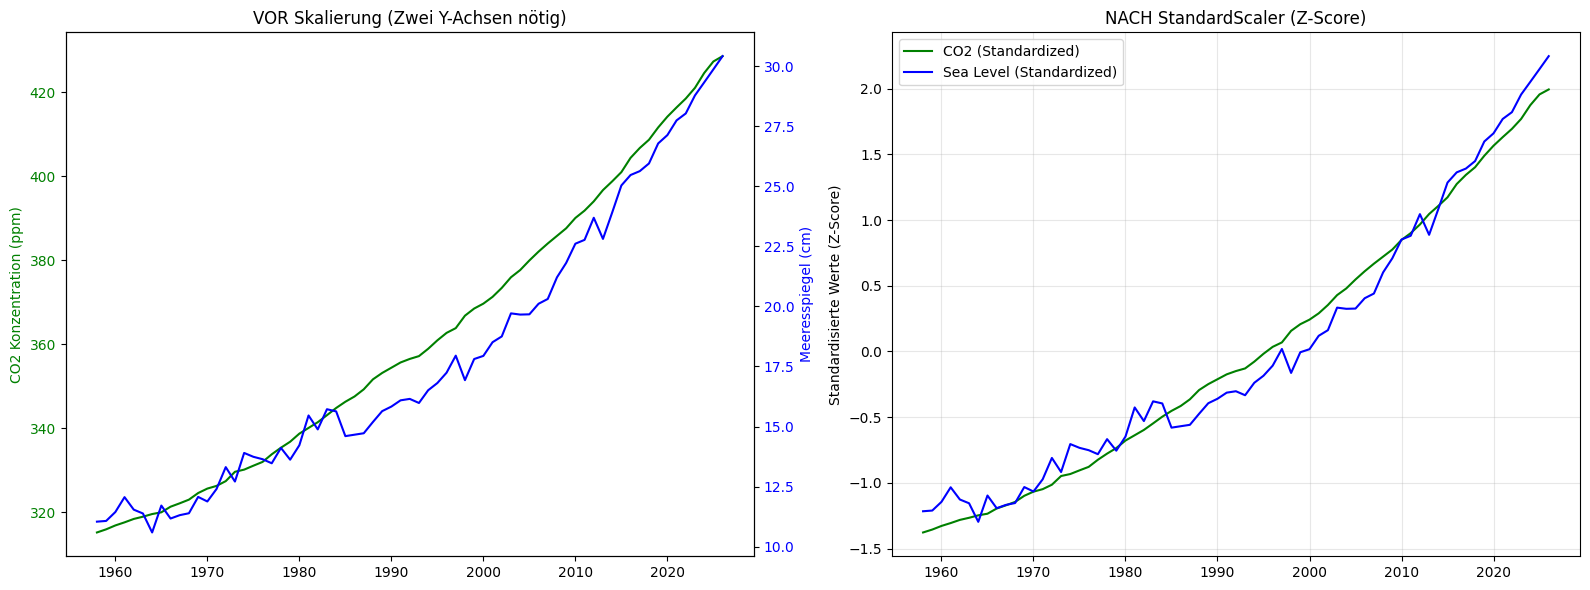

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# ============================================================
# Schritt 1: Datenvorbereitung – auf Jahreswerte aggregieren
#
# CO₂: Monatswerte → Jahresdurchschnitt (resample auf 'YE')
# Der Jahres-Index wird auf eine reine Ganzzahl vereinfacht,
# damit der spätere pd.merge() problemlos funktioniert.
# ============================================================
df_co2_yearly = df_co2[['average']].resample('YE').mean()
df_co2_yearly.index = df_co2_yearly.index.year  # z. B. 2024-12-31 → 2024

# Meeresspiegel: Index ebenfalls auf Jahres-Integer setzen
df_sea_yearly = df_sea_level[['CSIRO Adjusted Sea Level']].copy()
df_sea_yearly.index = df_sea_yearly.index.year

# ============================================================
# Inner Join: Nur Jahre behalten, die in BEIDEN Datensätzen
# vorhanden sind (verhindert NaN durch fehlende Überschneidungen)
# ============================================================
df_combined = pd.merge(df_co2_yearly, df_sea_yearly,
                       left_index=True, right_index=True)
df_combined.columns = ['CO2 (ppm)', 'Sea Level (cm)']

# ============================================================
# Schritt 2: StandardScaler anwenden (Z-Score-Normalisierung)
#
# Formel: z = (x − μ) / σ
#   μ = arithmetisches Mittel der Spalte
#   σ = Standardabweichung der Spalte
#
# Ergebnis: Mittelwert = 0, Standardabweichung = 1
# → Beide Variablen sind nun auf der gleichen Skala und
#   können von ML-Modellen fair miteinander verglichen werden.
# ============================================================
scaler_ts = StandardScaler()
df_scaled = pd.DataFrame(
    scaler_ts.fit_transform(df_combined),   # Scaler anpassen UND transformieren
    columns=df_combined.columns,
    index=df_combined.index
)

# ============================================================
# Schritt 3: Vorher-Nachher-Vergleich visualisieren
# Zwei Subplots nebeneinander
# ============================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# VORHER: Zwei unterschiedliche Y-Achsen nötig, da Wertebereiche
# stark verschieden sind (CO₂ > 400 ppm, Sea Level < 25 cm)
ax1.plot(df_combined.index, df_combined['CO2 (ppm)'], label='CO2 (ppm)', color='green')
ax1.set_ylabel('CO2 Konzentration (ppm)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax1_twin = ax1.twinx()  # Zweite Y-Achse auf der rechten Seite
ax1_twin.plot(df_combined.index, df_combined['Sea Level (cm)'],
              label='Sea Level (cm)', color='blue')
ax1_twin.set_ylabel('Meeresspiegel (cm)', color='blue')
ax1_twin.tick_params(axis='y', labelcolor='blue')
ax1.set_title('VOR Skalierung (Zwei Y-Achsen nötig)')

# NACHHER: Beide Kurven direkt auf einer gemeinsamen Achse vergleichbar
ax2.plot(df_scaled.index, df_scaled['CO2 (ppm)'],
         label='CO2 (Standardized)', color='green')
ax2.plot(df_scaled.index, df_scaled['Sea Level (cm)'],
         label='Sea Level (Standardized)', color='blue')
ax2.set_title('NACH StandardScaler (Z-Score)')
ax2.set_ylabel('Standardisierte Werte (Z-Score)')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


Wertebereich VORHER: Min = -79.59174346923828 m, Max = 202.7196807861328 m
Wertebereich NACHHER: Min = 0.0, Max = 1.0


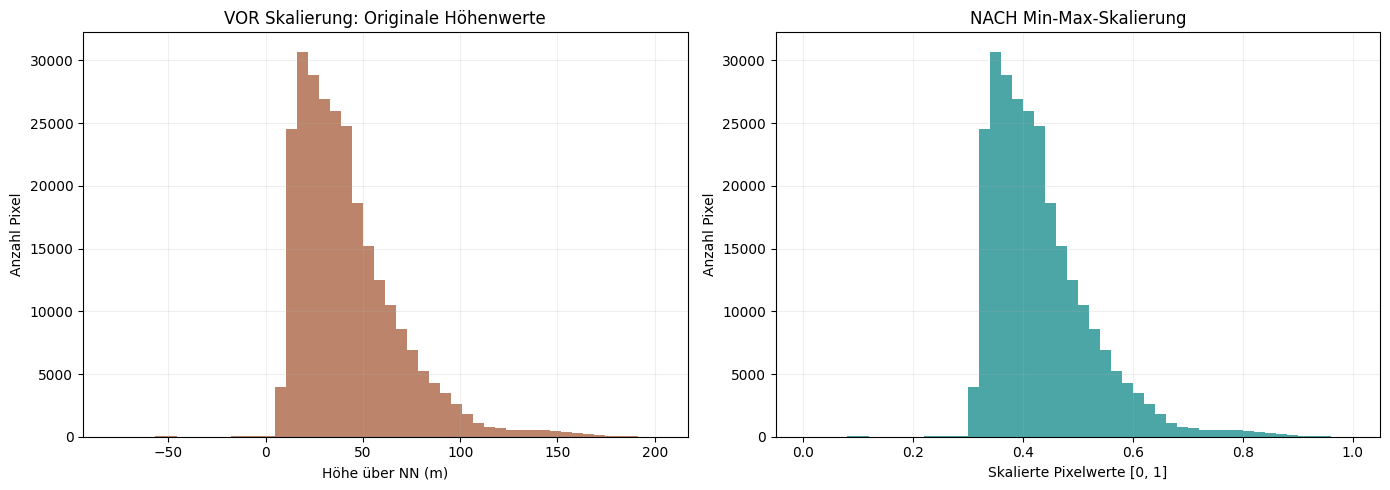

In [ ]:
# ============================================================
# Schritt 1: Höhenmodell erneut vom AWS laden
# (identisch zur Visualisierung in Aufgabe 2, aber diesmal
#  speichern wir die Rohdaten für die Skalierung)
# ============================================================
with rasterio.Env(AWSSession(aws_unsigned=True)):
    with rasterio.open(aws_url_topography) as src:
        dem_data = src.read(1, out_shape=(512, 512))  # numpy-Array: Form (512, 512)

# ============================================================
# Schritt 2: MinMaxScaler auf das Höhenmodell anwenden
#
# Formel: x_scaled = (x − x_min) / (x_max − x_min)
# → Alle Höhenwerte werden auf [0, 1] gestaucht.
#
# Wichtig: sklearn erwartet ein 2D-Array der Form (Samples, Features).
# Das 2D-Bildarray (512 × 512) wird daher zunächst zu einem
# 1D-Vektor (262144 × 1) "gefaltet" (flatten + reshape),
# nach der Skalierung wieder in die Originalform zurückgebracht.
# ============================================================
scaler_img = MinMaxScaler()
dem_scaled = (
    scaler_img
    .fit_transform(dem_data.reshape(-1, 1))   # 2D → 1D-Spaltenvektor, skalieren
    .reshape(dem_data.shape)                  # wieder zurück auf (512, 512)
)

# ============================================================
# Schritt 3: Histogramme der Pixelwerte vor und nach der Skalierung
# Das Histogramm zeigt die Verteilung aller Höhenwerte.
# Nach der Skalierung liegen alle Werte zwischen 0 und 1,
# die Form (Verteilung) der Kurve bleibt dabei erhalten.
# ============================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# VORHER: Originale Höhenwerte in Metern
ax1.hist(dem_data.flatten(), bins=50, color='sienna', alpha=0.7)
ax1.set_title('VOR Skalierung: Originale Höhenwerte')
ax1.set_xlabel('Höhe über NN (m)')
ax1.set_ylabel('Anzahl Pixel')
ax1.grid(alpha=0.2)

# NACHHER: Auf [0, 1] normierte Pixelwerte
ax2.hist(dem_scaled.flatten(), bins=50, color='teal', alpha=0.7)
ax2.set_title('NACH Min-Max-Skalierung')
ax2.set_xlabel('Skalierte Pixelwerte [0, 1]')
ax2.set_ylabel('Anzahl Pixel')
ax2.grid(alpha=0.2)

# ============================================================
# Wertebereiche für schnelle Sanity-Check-Ausgabe
# VORHER: Höchste und tiefste Stelle der Region in Metern
# NACHHER: Muss exakt 0.0 und 1.0 ergeben (Validierung!)
# ============================================================
print(f"Wertebereich VORHER: Min = {dem_data.min()} m, Max = {dem_data.max()} m")
print(f"Wertebereich NACHHER: Min = {dem_scaled.min():.4f}, Max = {dem_scaled.max():.4f}")

plt.tight_layout()
plt.show()


### 4.2 Auswirkungen auf die Machine-Learning-Algorithmen

Die durchgeführten Skalierungen haben eine direkte, entscheidende Auswirkung auf das anstehende Modelltraining für die Web-App „Degrees of No Return“:

*   **Erhaltung der Informationsstruktur:** Wie die Grafiken zeigen, bleiben die relativen Verteilungen und Trends der Daten exakt erhalten. Wir ändern nur den Maßstab, nicht die Information selbst.
*   **Auswirkung auf das Zeitreihen-Modell (Temperatur/CO₂):** Durch den `StandardScaler` werden CO₂- und Meeresspiegeldaten auf einen gemeinsamen Wertebereich gebracht. Dies verhindert, dass das Modell dem CO₂-Wert (ursprünglich > 400) ein künstlich höheres Gewicht beimisst als dem Meeresspiegel (ursprünglich < 25).
*   **Auswirkung auf das Überflutungs-Modell (Copernicus DEM):** Für das Training eines Deep-Learning-Modells zur Erkennung von Überflutungsflächen ist die Skalierung der Höhendaten auf den Bereich [0, 1] (wie bei einem Bild) zwingend erforderlich. Dies beschleunigt den Trainingsprozess, fördert die Konvergenz der Modellgewichte und beugt numerischer Instabilität vor.

---

## Aufgabe 5: Zusammenfassung und Interpretation im Projektkontext

Die „Understanding the Data“-Phase hat die datentechnische Grundlage für das Projekt **„Degrees of No Return“** geschaffen. Wir haben die zentralen, historischen und räumlichen Daten analysiert, ihre Qualität geprüft und sie für das maschinelle Lernen aufbereitet.

### 1. Zusammenfassung der Erkenntnisse
*   **Datensätze:** Das Projekt stützt sich auf vier Pfeiler: globale Temperatur-Anomalien (GISTEMP), CO₂-Konzentrationen (NOAA), Meeresspiegel-Daten (CSIRO) und hochaufgelöste Topografie-Daten (Copernicus DEM). Jeder Datensatz bedient einen spezifischen Teil unserer Forschungsfragen.
*   **Trends:** Die visuellen Analysen bestätigten die erwarteten, starken Korrelationen zwischen dem Zeitverlauf, dem CO₂-Anstieg und dem Meeresspiegel. Die räumliche Analyse zeigte die heterogene Verteilung der Erwärmung – eine wichtige Grundlage für das lokale Downscaling.
*   **Datenqualität:** Die Analyse fehlender Werte ergab, dass diese nicht zufällig, sondern historisch-technisch bedingt sind (sog. „Structurally Missing Data“). Gemäß unserer wissenschaftlichen Sorgfaltspflicht werden diese Lücken nicht künstlich gefüllt.
*   **Preprocessing:** Aufgrund der stark unterschiedlichen Skalen wurden maßgeschneiderte, aber standardisierte Skalierungsmethoden (`StandardScaler` für Zeitreihen, `MinMaxScaler` für Rasterdaten) angewandt, um die Daten für die jeweiligen Machine-Learning-Modelle optimal vorzubereiten.

### 2. Reflexion und Interpretation

**Welche Merkmale sind für die App am wichtigsten?**
Die absoluten Kernmerkmale sind die **saisonbereinigten CO₂-Werte** als globaler Treiber, die **CSIRO-Meeresspiegeldaten** als Zielvariable für globale Flutrisiken und die lokalen **Pixel-Höhenwerte des Copernicus DEM** zur Ableitung konkreter, lokaler Überflutungsflächen. Genau diese Kombination ermöglicht es der App, von der globalen Ursache zur lokalen Auswirkung zu gelangen.

**Welche Herausforderungen traten auf?**
Die größte Herausforderung war der Umgang mit der unterschiedlichen Dimensionalität und Granularität der Daten: monatliche 1D-Zeitreihen (CO₂), jährliche 1D-Zeitreihen (Meeresspiegel) und statische 2D/3D-Geodaten. Die Harmonisierung dieser unterschiedlichen Strukturen ist ein zentraler Punkt für die Modellierungspipeline.

**Wie werden diese Daten für die „Degrees of No Return“-App genutzt?**
Das finale System wird kein einzelnes „Super-Modell“ sein, sondern eine **Pipeline aus zwei Kernmodellen**:
1.  Ein **Zeitreihen-Modell**, das lernt, von der globalen CO₂-Konzentration auf die lokale Temperatur und die Anzahl der Hitzetage zu schließen.
2.  Ein **räumliches Modell** (z.B. semantische Segmentierung via CNN), das die prognostizierten Meeresspiegel-Szenarien mit dem skalierten DEM verschneidet, um Wahrscheinlichkeitskarten für Überflutungen zu generieren.

**Welche weiteren Preprocessing-Schritte sind sinnvoll?**
Bevor die Daten final ins Training gehen, ist eine **zeitliche Harmonisierung** zwingend: Die monatlichen CO₂-Daten müssen auf Jahreswerte aggregiert werden, um sie mit den jährlichen Meeresspiegeldaten in einem Modell zu kombinieren. Für das Copernicus DEM wäre zudem eine räumliche Eingrenzung (Maskierung) auf die relevante Zielregion sinnvoll, um Rechenleistung zu sparen und das Modell auf den urbanen Raum zu fokussieren.